In [2]:
library(Matrix)
library(arules)

In [4]:
data(Groceries)

In [5]:
str(Groceries)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


In [9]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

#### 지지도 5%이상의 item 막대 그래프

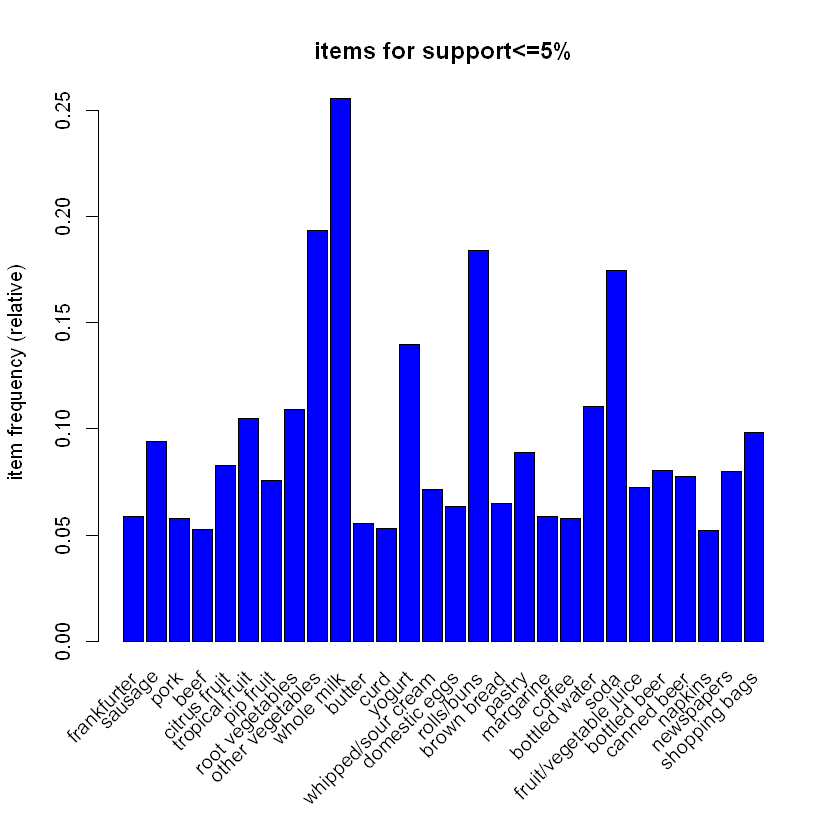

In [8]:
itemFrequencyPlot(Groceries, support= 0.05, main='items for support<=5%', col='blue')

### 지지도 상위 10개 막대 그래프

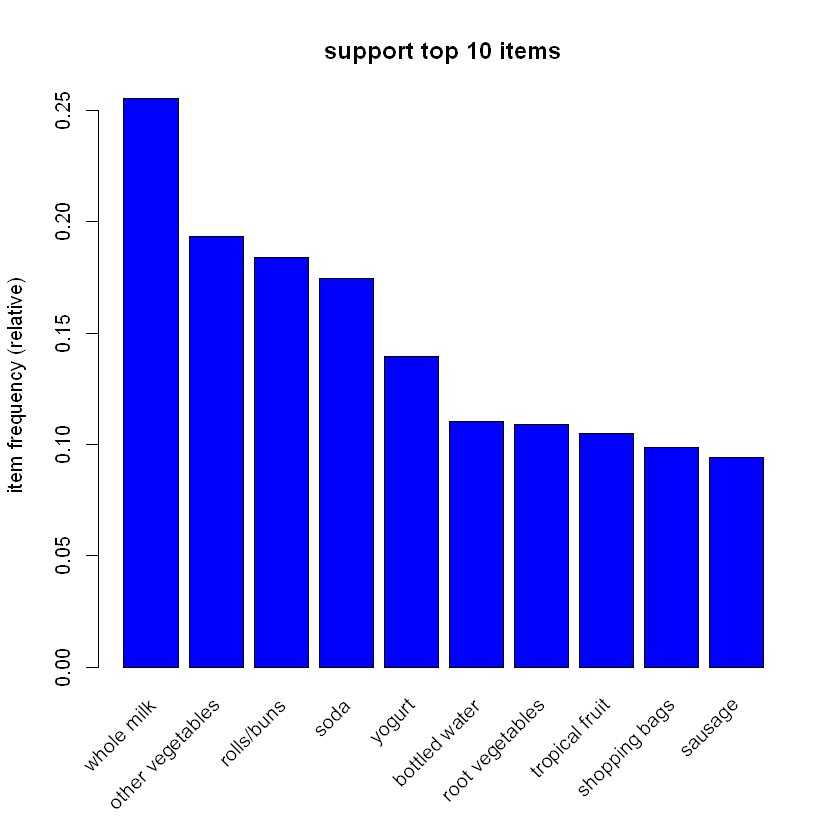

In [10]:
itemFrequencyPlot(Groceries, topN=10, main='support top 10 items', col= 'blue')

In [14]:
Grocery_rule <- apriori(Groceries, parameter = list(support=0.05, confidence= 0.2, minlen= 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 491 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


### 위의 support, confidence를 너무 높게 잡으면 연관규칙 분석이 안됨

In [19]:
inspect(Grocery_rule)

    lhs                   rhs                support    confidence lift    
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  1.571735
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  1.571735
[3] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  1.205032
[4] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  1.205032
[5] {other vegetables} => {whole milk}       0.07483477 0.3867578  1.513634
[6] {whole milk}       => {other vegetables} 0.07483477 0.2928770  1.513634


### 정렬하기

In [18]:
inspect(sort(Grocery_rule,by='lift'))

    lhs                   rhs                support    confidence lift    
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  1.571735
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  1.571735
[3] {other vegetables} => {whole milk}       0.07483477 0.3867578  1.513634
[4] {whole milk}       => {other vegetables} 0.07483477 0.2928770  1.513634
[5] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  1.205032
[6] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  1.205032


In [16]:
summary(Grocery_rule)

set of 6 rules

rule length distribution (lhs + rhs):sizes
2 
6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support          confidence          lift      
 Min.   :0.05602   Min.   :0.2193   Min.   :1.205  
 1st Qu.:0.05618   1st Qu.:0.2395   1st Qu.:1.282  
 Median :0.05663   Median :0.3004   Median :1.514  
 Mean   :0.06250   Mean   :0.3050   Mean   :1.430  
 3rd Qu.:0.07028   3rd Qu.:0.3670   3rd Qu.:1.557  
 Max.   :0.07483   Max.   :0.4016   Max.   :1.572  

mining info:
      data ntransactions support confidence
 Groceries          9835    0.05        0.2

### 연관규칙-품목별 연관성 탐색

In [20]:
rule_interest <- subset(Grocery_rule, items %in% c('yogurt', 'whole milk'))
inspect(rule_interest)

    lhs                   rhs                support    confidence lift    
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  1.571735
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  1.571735
[3] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  1.205032
[4] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  1.205032
[5] {other vegetables} => {whole milk}       0.07483477 0.3867578  1.513634
[6] {whole milk}       => {other vegetables} 0.07483477 0.2928770  1.513634


### 연관규칙결과를 data.frame으로 저장

In [21]:
Grocery_rule_df <- as(Grocery_rule, 'data.frame')
Grocery_rule_df

rules,support,confidence,lift
{yogurt} => {whole milk},0.05602440,0.4016035,1.571735
{whole milk} => {yogurt},0.05602440,0.2192598,1.571735
{rolls/buns} => {whole milk},0.05663447,0.3079049,1.205032
{whole milk} => {rolls/buns},0.05663447,0.2216474,1.205032
{other vegetables} => {whole milk},0.07483477,0.3867578,1.513634
{whole milk} => {other vegetables},0.07483477,0.2928770,1.513634
